In [1]:
import json
import logging
from faster_coco_eval import COCO
from faster_coco_eval.extra import Curves

logging.root.setLevel("INFO")
logging.debug("Запись.")

In [2]:
def load(file):
    with open(file) as io:
        _data = json.load(io)
        
    return _data

In [3]:
prepared_coco_in_dict = load('../tests/data/eval_all_coco.json')
prepared_anns         = load('../tests/data/result_annotations.json')

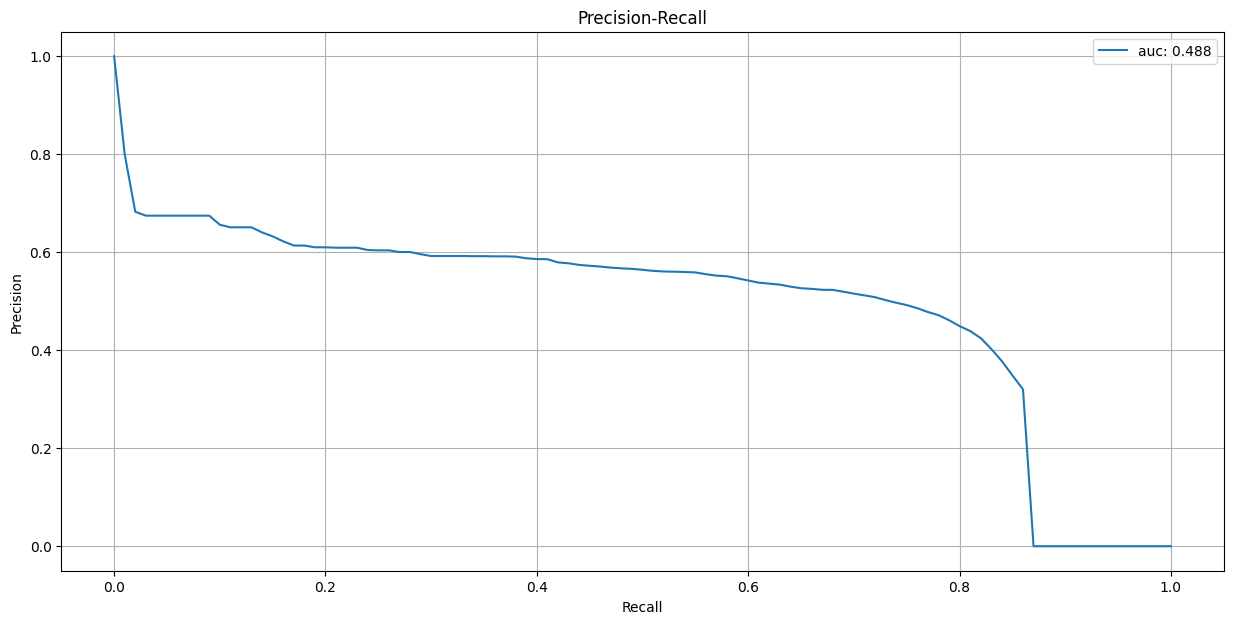

In [4]:
threshold_iou = 0.5

cocoGt = COCO(prepared_coco_in_dict)
cocoDt = cocoGt.loadRes(prepared_anns)

cur = Curves(cocoGt, cocoDt, iou_tresh=threshold_iou, iouType='segm')
cur.plot_pre_rec(plotly_backend=False)

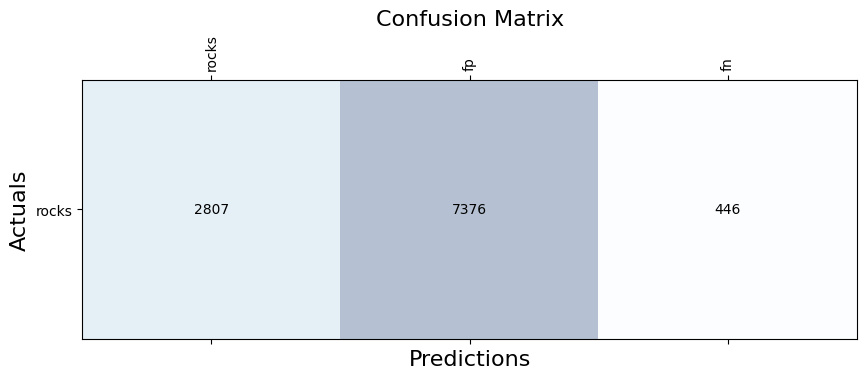

In [5]:
cur.display_matrix()